In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [12]:
# 生成数据
def gen_data(x1):
    y = np.sin(x1)
    return y
def load_data():
    x1 = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    data_train =gen_data(x1) + np.random.randn(50) * 0.2
    #data_train =[gen_data(x1)  for x1 in x1]
    return x1,data_train
def load_data_norm():
    x1 = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    data_train =gen_data(x1)
    #data_train =[gen_data(x1)  for x1 in x1]
    return x1,data_train

Text(0.5, 1.0, 'using function sin() generate sample data')

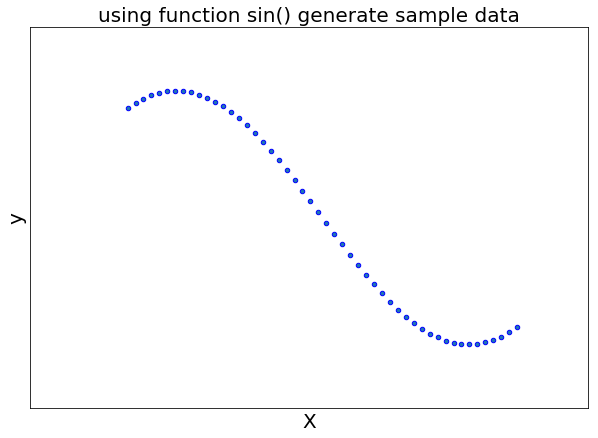

In [13]:
###正常生成的数据的样子
plt.figure(figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
X, y = load_data_norm()
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("X",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.xlim((0, 6))
plt.ylim((-1.5, 1.5))
plt.title("using function sin() generate sample data",fontsize=20)

Text(0.5, 1.0, 'add noise on sample data')

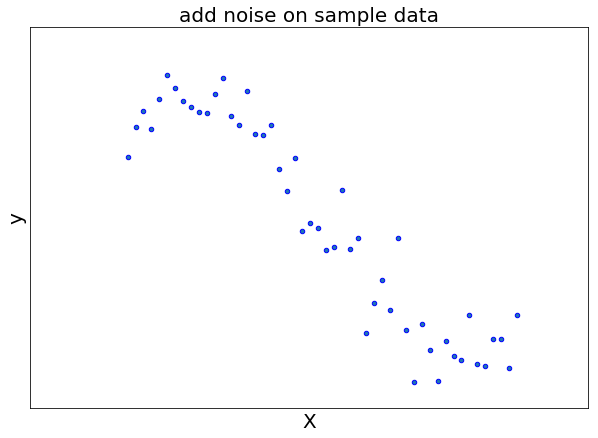

In [14]:
###正常生成的数据的样子
plt.figure(figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
X, y = load_data()
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("X",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.xlim((0, 6))
plt.ylim((-1.5, 1.5))
plt.title("add noise on sample data",fontsize=20)

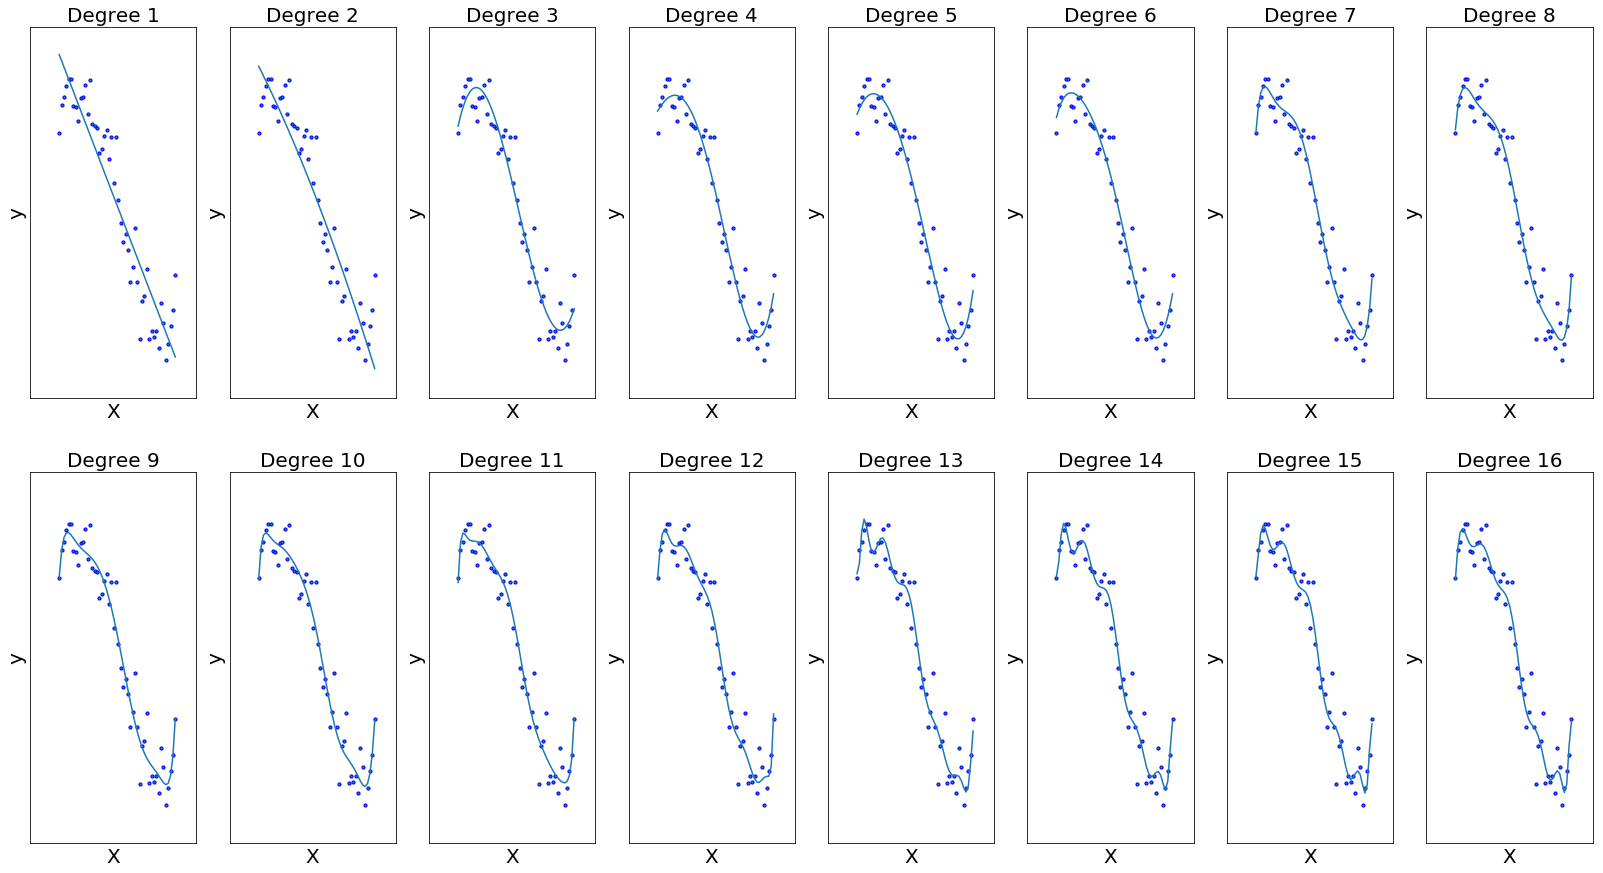

In [21]:
###OLS的拟合方法
#degrees = [1,3, 6, 9, 12, 15]
degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#degrees = [1]
plt.figure(figsize=(28, 15))
res=[]
X, y = load_data()
for i in range(len(degrees)):
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    a=list(linear_regression.coef_)
    a.insert(0,linear_regression.intercept_)
    #print(a)
    #print(linear_regression.coef_)
    #print(linear_regression.intercept_)
    #linear_regression.score(X, y)
    X_test = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    predict_y = pipeline.predict(X_test[:, np.newaxis])
    #plt.plot(X_test, np.sin(X_test), label="True function")
    mse = mean_squared_error(gen_data(X_test),predict_y)
    #print('mse:',mse)
    a.insert(0,mse)
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("X",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.xlim((0, 6))
    plt.ylim((-1.5, 1.5))
    #plt.title('A simple plot')
    plt.title("Degree {}".format(degrees[i]),fontsize=20)
    res.append(a)
pd.DataFrame(res).to_csv('OLS.csv')
plt.show()

In [75]:
linear_regression.intercept_

-85.87248431856509

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

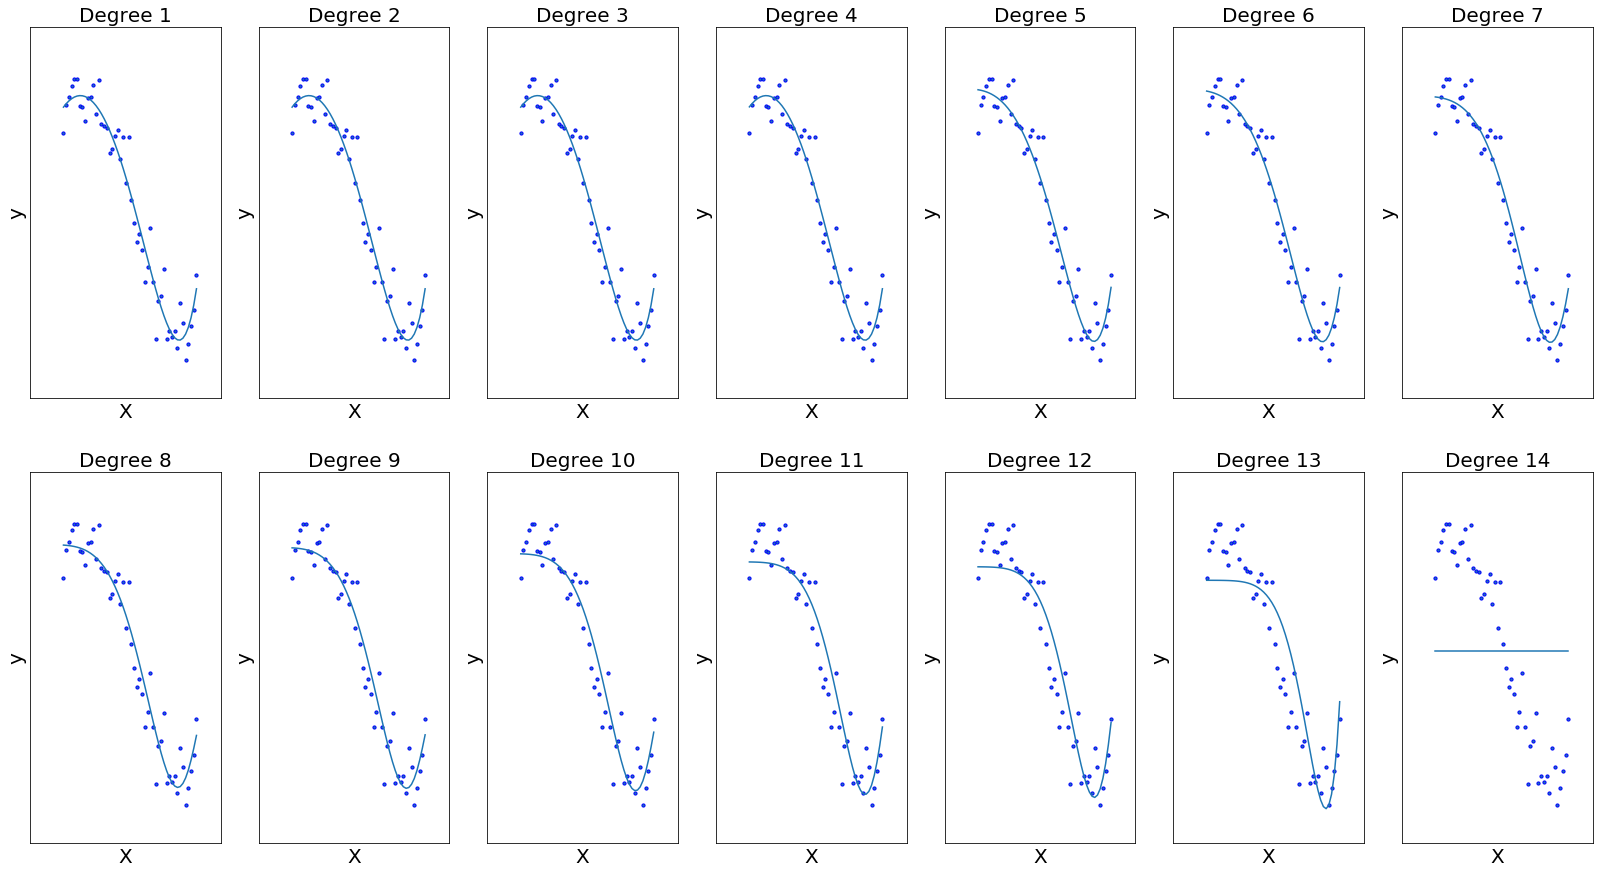

In [22]:
###Lasso的
alpha = [1e-15,1e-8,1e-6,1e-4,1e-2,1e-1,1,2,5,10,50,100,1000,10000000000]

plt.figure(figsize=(28, 15))
res = []
for i in range(len(alpha)):
    ax = plt.subplot(2, len(alpha)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    #X, y = load_data()
    polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    #linear_regression = LinearRegression()
    lasso = Lasso(alpha=alpha[i])
    #print(lasso)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("lasso", lasso)])
    pipeline.fit(X[:, np.newaxis], y)
    a=list(lasso.coef_)
    a.insert(0,lasso.intercept_)
    #print(a)
    #print(lasso.coef_)
    #print(lasso.intercept_)
    
    X_test = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    predict_y = pipeline.predict(X_test[:, np.newaxis])
    mse = mean_squared_error(gen_data(X_test),predict_y)
    #print('mse:',mse)
    a.insert(0,mse)
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("X",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.xlim((0, 6))
    plt.ylim((-1.5, 1.5))
    #plt.title('A simple plot')
    plt.title("Degree {}".format(degrees[i]),fontsize=20)
    res.append(a)
pd.DataFrame(res).to_csv('Lasso.csv')
plt.show()

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.614616e-27
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.245548e-27
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.537553e-26
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal con

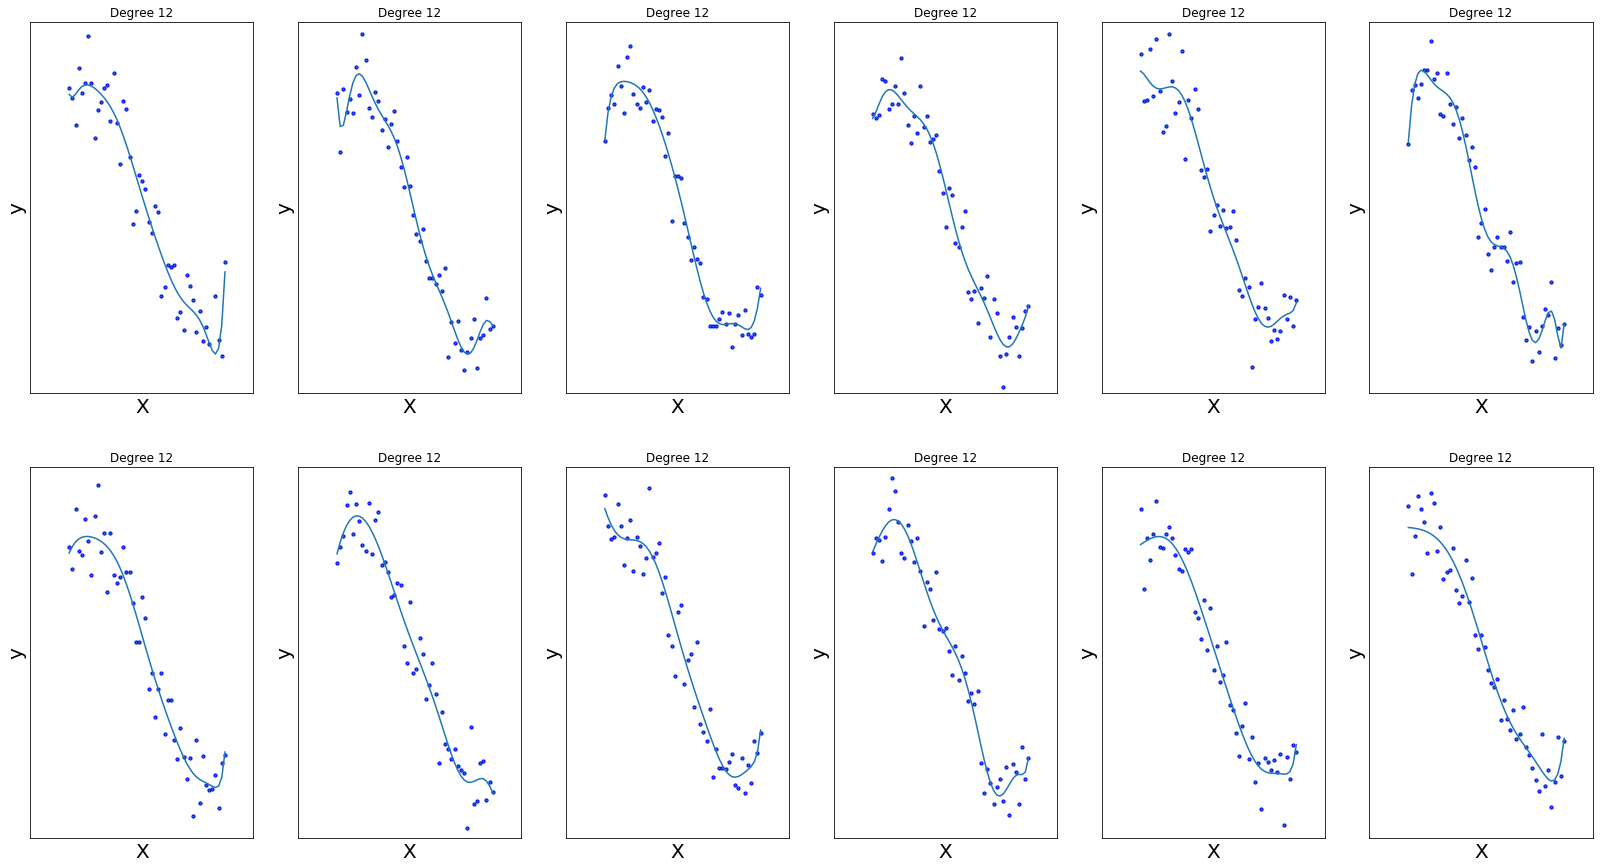

In [25]:
###Ridge
alpha = [1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,20000]

plt.figure(figsize=(28, 15))
res = []  
for i in range(len(alpha)):
    ax = plt.subplot(2, len(alpha)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    X, y = load_data()
    polynomial_features = PolynomialFeatures(degree=12, include_bias=False)
    #linear_regression = LinearRegression()
    ridge = Ridge(alpha=alpha[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),("Ridge", ridge)])
    pipeline.fit(X[:, np.newaxis], y)
    a=list(ridge.coef_)
    a.insert(0,ridge.intercept_)
    #print(a)
    #print(ridge.coef_)
    #print(ridge.intercept_)
    X_test = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #plt.plot(X_test, np.sin(X_test), label="True function")
    predict_y = pipeline.predict(X_test[:, np.newaxis])
    mse = mean_squared_error(gen_data(X_test),predict_y)
    #print('mse:',mse)
    a.insert(0,mse)
    
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("X",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.xlim((0, 6))
    plt.ylim((-1.5, 1.5))
    #plt.title('A simple plot')
    plt.title("Degree {}".format(12,fontsize=20))
    res.append(a)
pd.DataFrame(res).to_csv('ridge.csv')
plt.show()